In [8]:
#dependencies
import pandas as pd
import numpy as np
import requests
import matplotlib.pyplot as plt



In [9]:
from fredapi.version import version as __version__
from fredapi.fred import Fred

In [10]:
# Import the Fred API key
from api_keys import fred_api_key

In [11]:
# class that will interact with the FRED API

class FredPy:

    def __init__(self, token=None):
        self.token = token
        self.url = "https://api.stlouisfed.org/fred/series/observations" + \
            "?series_id={seriesID}&api_key={key}&file_type=json" + \
            "&observation_start={start}&observation_end={end}&units={units}"

    def set_token(self, token):
        self.token = token

    def get_series(self, seriesID, start, end, units):

        # The URL string with the values inserted into it
        url_formatted = self.url.format(
            seriesID=seriesID, start=start, end=end, units=units, key=self.token
        )

        response = requests.get(url_formatted)

        # If the response was successful, extract the data from it
        if(response.status_code == 200):
            data = pd.DataFrame(response.json()['observations'])[['date', 'value']]\
                    .assign(date = lambda cols: pd.to_datetime(cols['date']))\
                    .assign(value = lambda cols: cols['value'].astype(float))\
                    .rename(columns = {'value': seriesID})
            
            return data
        
        else:
            raise Exception("Error from API, status code' = {}".format(response.status_code))


In [12]:
# Instantiate fredpy object
fredpy = FredPy()

# Set the API key
fredpy.set_token(fred_api_key)


In [13]:
# Get the GDP series and DataFrame (Billions of Dollars)
GDPV_df = fredpy.get_series(
    seriesID = 'GDP',
    start = '2003-02-01',
    end = '2023-02-01',
    units = 'lin'
)
GDPV_df


,date,GDP
0,2003-01-01,11174.129
1,2003-04-01,11312.766
2,2003-07-01,11566.669
3,2003-10-01,11772.234
4,2004-01-01,11923.447
...,...,...
75,2021-10-01,24349.121
76,2022-01-01,24740.480
77,2022-04-01,25248.476
78,2022-07-01,25723.941


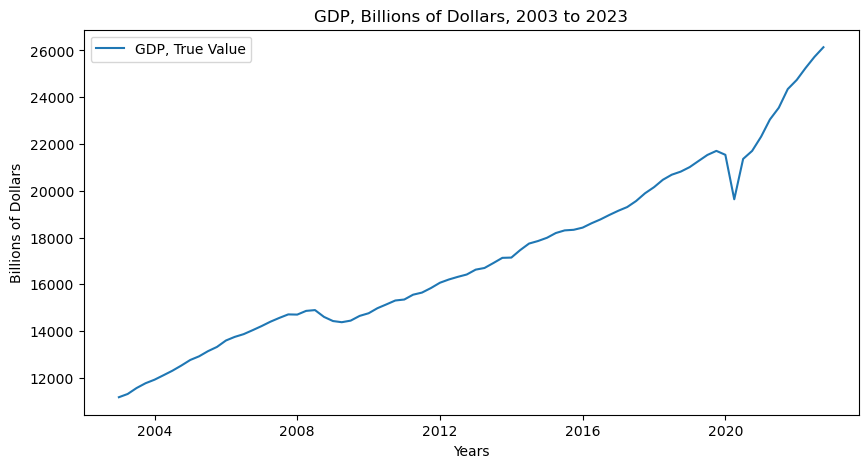

In [32]:
# visualizations to support data

plt.figure(figsize = (10,5))
plt.plot(GDPV_df['date'], GDPV_df['GDP'], label="GDP, True Value")
plt.title ("GDP, Billions of Dollars, 2003 to 2023")
plt.xlabel ("Years")
plt.ylabel ("Billions of Dollars")
plt.savefig ("D:\Data Science\Project 1\CPI Project\GDPV.png")
plt.legend(loc='best')
plt.show()

In [15]:
# Get the GDP series and DataFrame (Percentage Change, Annual)
GDP_df = fredpy.get_series(
    seriesID = 'GDP',
    start = '2003-02-01',
    end = '2023-02-01',
    units = 'pc1'
)
GDP_df

,date,GDP
0,2003-01-01,3.62247
1,2003-04-01,3.90638
2,2003-07-01,5.30432
3,2003-10-01,6.42594
4,2004-01-01,6.70583
...,...,...
75,2021-10-01,12.18360
76,2022-01-01,10.87499
77,2022-04-01,9.55243
78,2022-07-01,9.22922


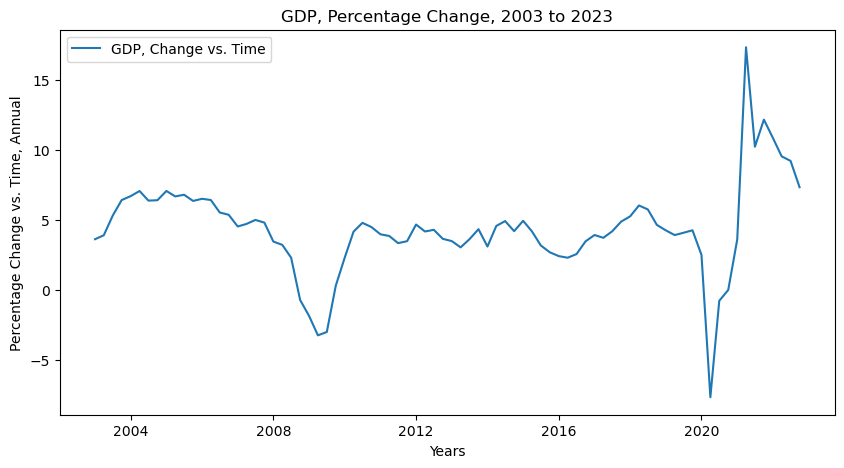

In [33]:
# visualizations to support data

plt.figure(figsize = (10,5))
plt.plot(GDP_df['date'], GDP_df['GDP'], label="GDP, Change vs. Time")
plt.title ("GDP, Percentage Change, 2003 to 2023")
plt.xlabel ("Years")
plt.ylabel ("Percentage Change vs. Time, Annual")
plt.savefig ("D:\Data Science\Project 1\CPI Project\GDP.png")
plt.legend(loc='best')
plt.show()

In [17]:
# Get the Fed Fund Rate series and DataFrame (Percentage)
FF_df = fredpy.get_series(
    seriesID = 'FEDFUNDS',
    start = '2003-02-01',
    end = '2023-02-01',
    units = 'lin'
)
FF_df

,date,FEDFUNDS
0,2003-02-01,1.26
1,2003-03-01,1.25
2,2003-04-01,1.26
3,2003-05-01,1.26
4,2003-06-01,1.22
...,...,...
236,2022-10-01,3.08
237,2022-11-01,3.78
238,2022-12-01,4.10
239,2023-01-01,4.33


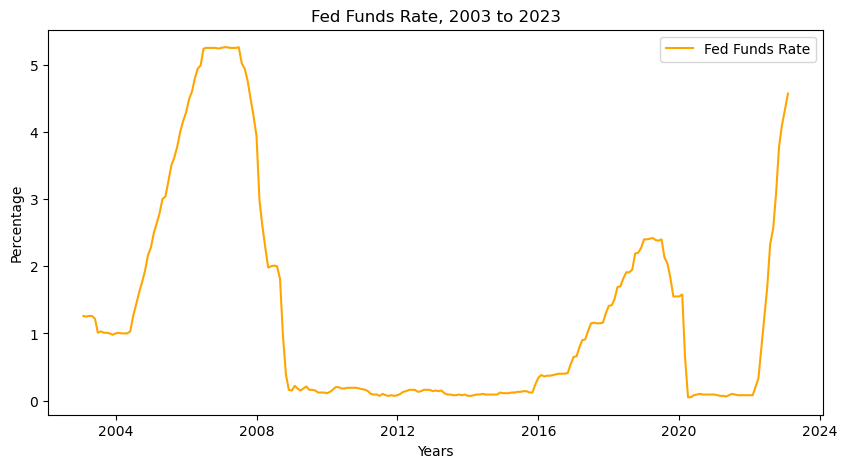

In [36]:
# visualizations to support data

plt.figure(figsize = (10,5))
plt.plot(FF_df['date'], FF_df['FEDFUNDS'], color="orange", label="Fed Funds Rate")
plt.title ("Fed Funds Rate, 2003 to 2023")
plt.xlabel ("Years")
plt.ylabel ("Percentage")
plt.savefig ("D:\Data Science\Project 1\CPI Project\FF.png")
plt.legend(loc='best')
plt.show()

In [19]:
FFGDP_df = pd.merge(FF_df, GDP_df,)
FFGDP_df

,date,FEDFUNDS,GDP
0,2003-04-01,1.26,3.90638
1,2003-07-01,1.01,5.30432
2,2003-10-01,1.01,6.42594
3,2004-01-01,1.00,6.70583
4,2004-04-01,1.00,7.07209
...,...,...,...
74,2021-10-01,0.08,12.18360
75,2022-01-01,0.08,10.87499
76,2022-04-01,0.33,9.55243
77,2022-07-01,1.68,9.22922


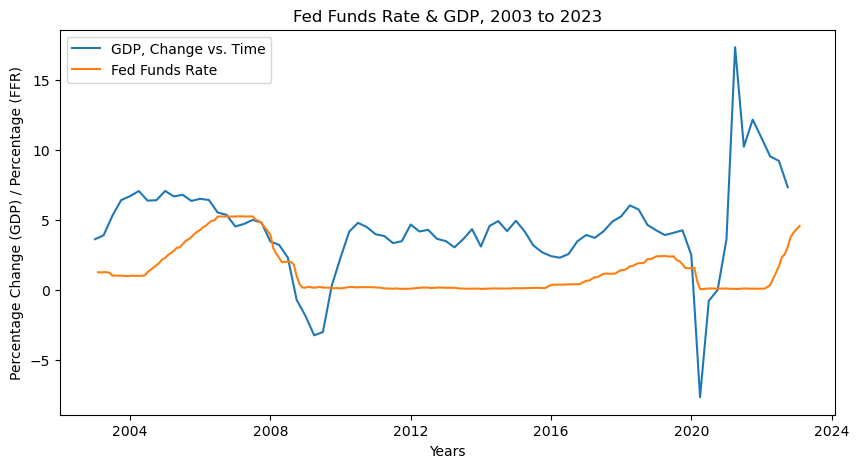

In [35]:
# visualizations to support data

plt.figure(figsize = (10,5))
plt.plot(GDP_df['date'], GDP_df['GDP'], label="GDP, Change vs. Time")
plt.plot(FF_df['date'], FF_df['FEDFUNDS'], label="Fed Funds Rate")
plt.xlabel ("Years")
plt.ylabel ("Percentage Change (GDP) / Percentage (FFR)")
plt.savefig ("D:\Data Science\Project 1\CPI Project\FFGDP.png")
plt.legend(loc='best')
plt.title("Fed Funds Rate & GDP, 2003 to 2023")
plt.show()